In [45]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [46]:
from ms_mint.notebook import Mint
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.dpi"] = 150
plt.rcParams['figure.constrained_layout.use'] = True

sns.set_context('paper')

# Load input files and run Mint.

In [48]:
mint = Mint().load_targets('/data/Metabolomics/ms-mint/demofiles/targets.csv').load_files('/data/Metabolomics/ms-mint/demofiles/**/*mz*ML').run()

maxtasksperchild: None


## Show targets

In [49]:
mint.targets

mz_mean  mz_width       rt  rt_min  rt_max rt_unit  \
peak_label                                                         
Arabitol    151.06050        10  295.500   279.0   312.0       s   
Xanthine    151.02585        10  262.359   250.8   271.8       s   
Succinate   117.01905        10  122.634    52.2   150.0       s   
Urocanate   137.03540        10  264.900   258.0   276.0       s   
Mevalonate  147.06570        10  180.000   102.0   258.0       s   
Nicotinate  122.02455        10  183.204   165.0   225.0       s   
Citrulline  174.08810        10  504.042   501.0   510.0       s   

            intensity_threshold target_filename  
peak_label                                       
Arabitol                      0     targets.csv  
Xanthine                      0     targets.csv  
Succinate                     0     targets.csv  
Urocanate                     0     targets.csv  
Mevalonate                    0     targets.csv  
Nicotinate                    0     targets.csv  
Citrulline                    0     targets.csv

## Show files

In [50]:
mint.ms_files

['/data/Metabolomics/ms-mint/demofiles/ms-files/CA_B1.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/CA_B2.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/CA_B3.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/CA_B4.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/EC_B1.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/EC_B2.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/EC_B3.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/EC_B4.mzXML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/SA_B1.mzML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/SA_B2.mzML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/SA_B3.mzML',
 '/data/Metabolomics/ms-mint/demofiles/ms-files/SA_B4.mzML']

# Save results

In [51]:
mint.export('results.csv')

# Load results

In [52]:
mint = Mint()
mint.load('results.csv')

# Data transformation

In [53]:
mint.results.columns

Index(['ms_file', 'peak_label', 'mz_mean', 'mz_width', 'rt', 'rt_min',
       'rt_max', 'rt_unit', 'intensity_threshold', 'target_filename',
       'peak_area', 'peak_area_top3', 'peak_n_datapoints', 'peak_max',
       'peak_rt_of_max', 'peak_min', 'peak_median', 'peak_mean',
       'peak_delta_int', 'peak_shape_rt', 'peak_shape_int',
       'peak_mass_diff_25pc', 'peak_mass_diff_50pc', 'peak_mass_diff_75pc',
       'peak_score', 'total_intensity', 'ms_path', 'ms_file_size'],
      dtype='object')

In [38]:
mint.crosstab().style.background_gradient()

In [39]:
mint.crosstab(col_normalized=True).style.background_gradient()

In [37]:
mint.crosstab().apply(np.log2).style.background_gradient()

## Check instrument callibration

In [44]:
mint.crosstab('peak_mass_diff_50pc').style.background_gradient(cmap='Reds')

# Show results

In [5]:
mint.results

ms_file  peak_label    mz_mean  mz_width       rt      rt_min  \
0   CA_B1.mzXML    Arabitol  151.06050        10  295.500  279.000000   
1   CA_B1.mzXML    Xanthine  151.02585        10  262.359  212.752688   
2   CA_B1.mzXML   Succinate  117.01905        10  122.634  112.373688   
3   CA_B1.mzXML   Urocanate  137.03540        10  264.900  258.000000   
4   CA_B1.mzXML  Mevalonate  147.06570        10  180.000  102.000000   
..          ...         ...        ...       ...      ...         ...   
79   SA_B4.mzML   Succinate  117.01905        10  122.634  112.373688   
80   SA_B4.mzML   Urocanate  137.03540        10  264.900  258.000000   
81   SA_B4.mzML  Mevalonate  147.06570        10  180.000  102.000000   
82   SA_B4.mzML  Nicotinate  122.02455        10  183.204  165.000000   
83   SA_B4.mzML  Citrulline  174.08810        10  504.042  500.392790   

        rt_max rt_unit  intensity_threshold target_filename  ...  \
0   312.000000       s                    0     targets.csv  ...   
1   246.500649       s                    0     targets.csv  ...   
2   131.430980       s                    0     targets.csv  ...   
3   276.000000       s                    0     targets.csv  ...   
4   258.000000       s                    0     targets.csv  ...   
..         ...     ...                  ...             ...  ...   
79  131.430980       s                    0     targets.csv  ...   
80  276.000000       s                    0     targets.csv  ...   
81  258.000000       s                    0     targets.csv  ...   
82  225.000000       s                    0     targets.csv  ...   
83  523.114899       s                    0     targets.csv  ...   

    peak_delta_int                                      peak_shape_rt  \
0       655.581543  279.18,279.86,280.55,281.25,281.96,282.68,283....   
1     16612.371094  213.19,213.94,214.7,215.46,216.22,216.97,217.7...   
2    137534.490723  112.46,113.22,113.98,114.73,115.49,116.25,117....   
3       296.750793  258.39,259.15,259.91,260.67,261.43,262.18,262....   
4        70.615784  105.63,106.39,114.73,115.49,123.83,125.35,127....   
..             ...                                                ...   
79   165448.062500  112.87,113.63,114.39,115.15,115.91,116.66,117....   
80      860.224487  258.68,259.41,260.16,260.9,261.66,262.42,263.1...   
81     1998.365295  102.26,103.02,103.77,104.53,105.29,106.05,106....   
82     3305.074646  168.98,169.74,171.26,172.02,172.78,173.53,174....   
83     9467.294495  502.94,503.7,504.46,505.22,505.98,506.74,507.4...   

                                       peak_shape_int  peak_mass_diff_25pc  \
0   6006,9870,14188,20467,35327,41981,46871,60581,...             2.330528   
1   14710,11319,14028,18028,33059,46889,61425,7535...            -0.313772   
2   144502,102981,80033,61764,56466,39326,30992,31...             0.200705   
3   451,911,869,2694,5126,4307,4910,5561,2827,2801...            -0.693082   
4   333,377,475,479,444,428,548,562,721,511,1240,4...             1.689628   
..                                                ...                  ...   
79  504985,832045,1115945,1345337,1803320,1926285,...             2.678225   
80  1766,1006,1997,4815,8260,19600,36457,31669,343...             1.895788   
81  2681,3101,5945,7104,7598,10937,22360,25050,350...             4.231623   
82  435,645,2091,3105,4858,7611,12579,15085,23960,...             2.012154   
83  9863,88422,57226,16780,6591,2986,2024,678,1730...             1.821223   

    peak_mass_diff_50pc  peak_mass_diff_75pc  peak_score  total_intensity  \
0              2.482045             2.633562    0.061349     2.552636e+10   
1             -0.212738            -0.212738    0.342670     2.552636e+10   
2              0.265903             0.265903    0.006247     2.552636e+10   
3             -0.331197            -0.108499    0.123961     2.552636e+10   
4              2.104648             2.208403    0.015584     2.552636e+10   
..                  ...               

## Plot peak shapes

In [ ]:
mint.plot.peak_shapes(col_wrap = 3, height=2.5, aspect=1.5)
plt.savefig('peak-shapes-before-opt.png', facecolor='w')

## Optimize retention times

Reading files...


100%|██████████| 7/7 [00:00<00:00,  7.97it/s]
/mnt/c/Users/soere/workspace/ms-mint/ms_mint/targets.py:359: UserWarning:

This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.



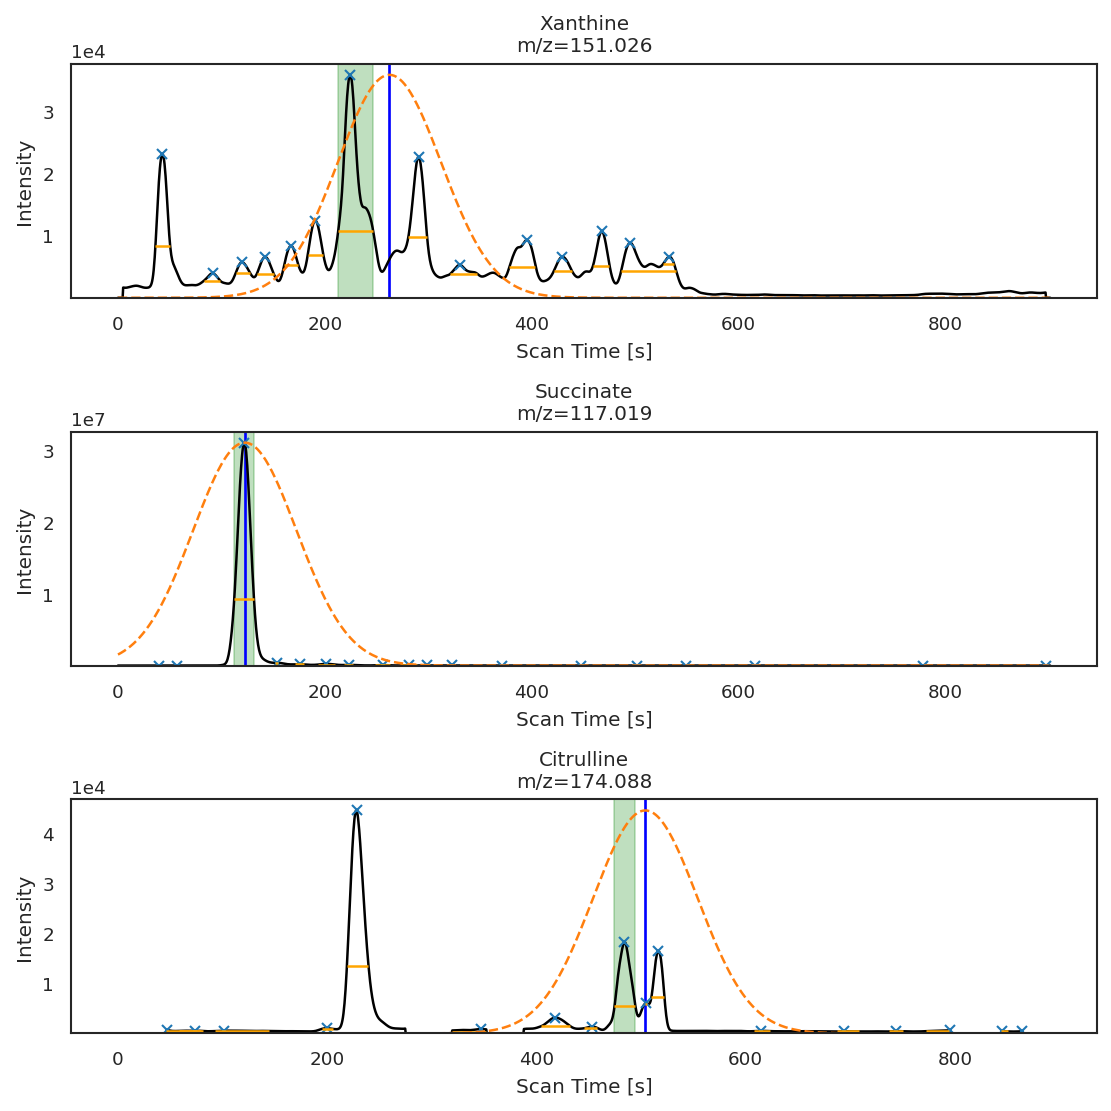

In [61]:
_ = mint.opt.rt_min_max(
    peak_labels=['Xanthine', 'Succinate', 'Citrulline'], 
    plot=True, rel_height=0.7, sigma=50, col_wrap=1, aspect=3,
    height=2.5,
)
plt.savefig('opt-rt.png', facecolor='w')
_

In [62]:
_

In [55]:
mint.run()

maxtasksperchild: None


/home/swacker/miniconda3/envs/ms-mint/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning:

This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.



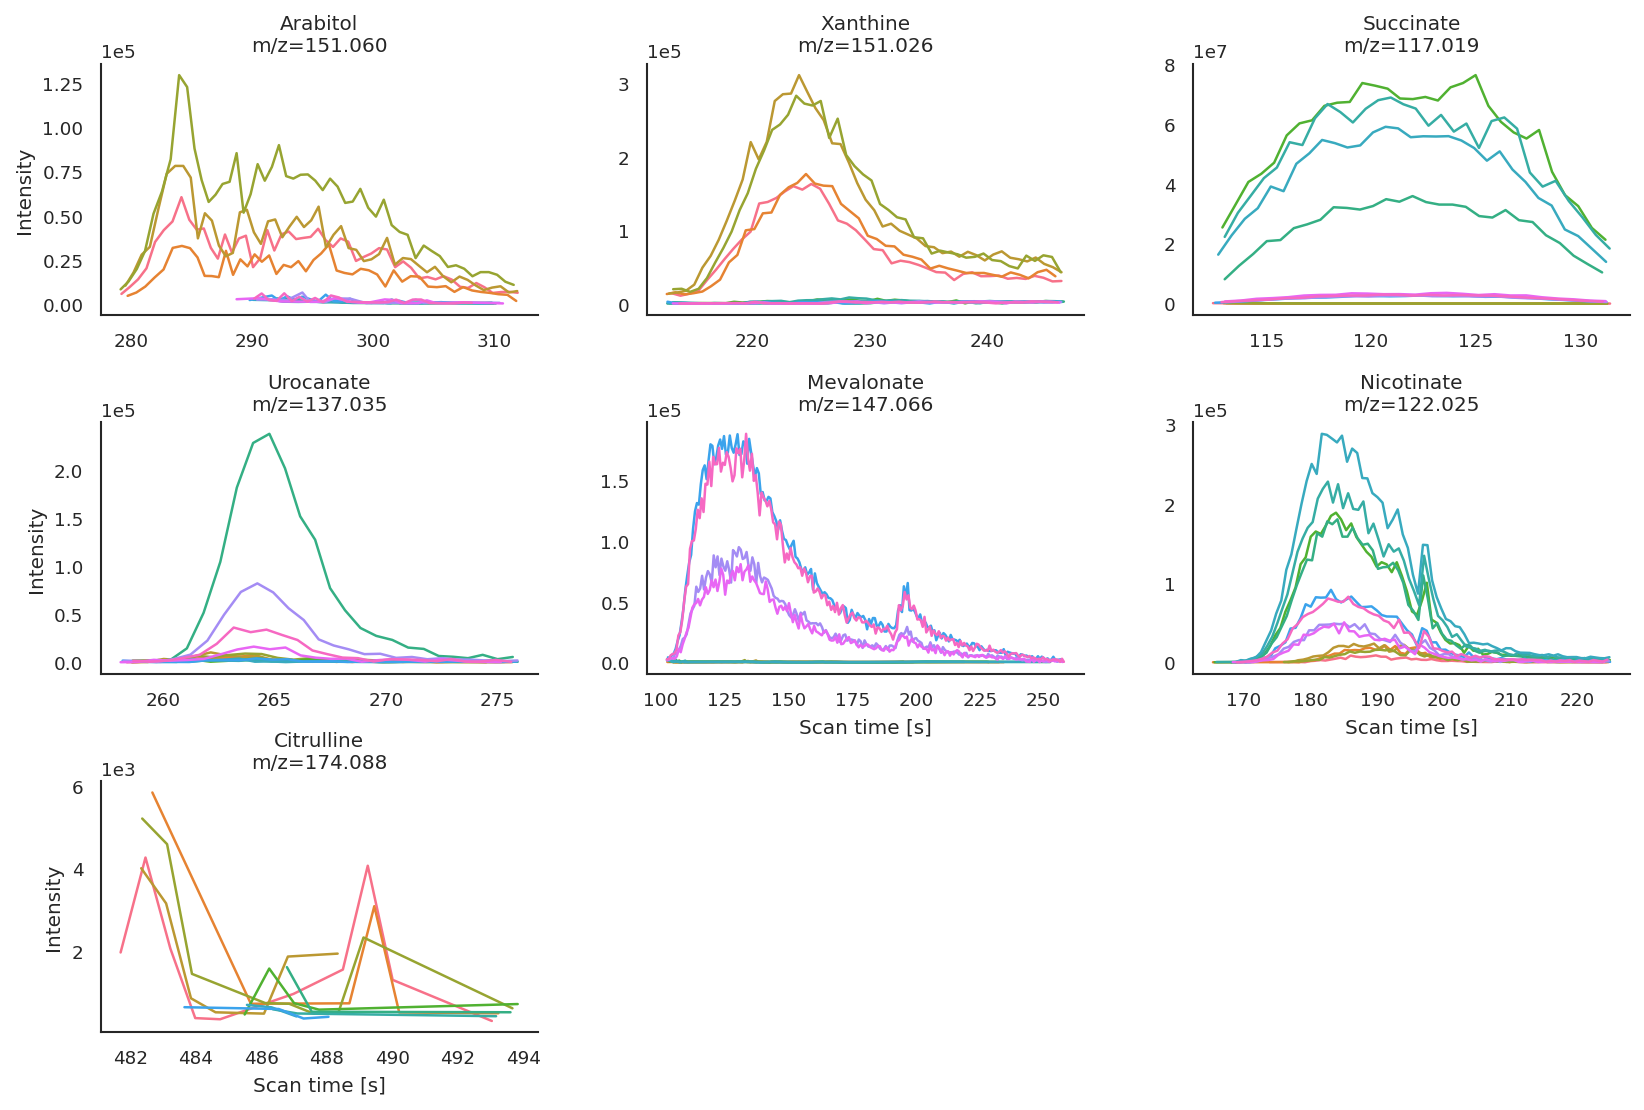

In [56]:
mint.plot.peak_shapes(col_wrap = 3, height=2.5, aspect=1.5)

Reading files...


100%|██████████| 7/7 [00:01<00:00,  5.47it/s]
/mnt/c/Users/soere/workspace/ms-mint/ms_mint/targets.py:359: UserWarning:

This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.



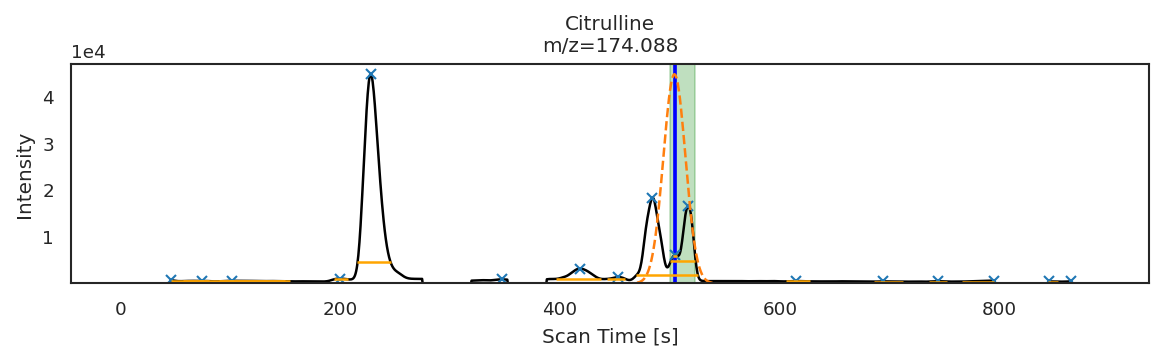

In [57]:
mint.opt.find_rt_min_max(plot=True, peak_labels=['Citrulline'], minimum_intensity=1e2, rel_height=0.9, sigma=10, aspect=3, height=2.5)

In [58]:
mint.run()

maxtasksperchild: None


/home/swacker/miniconda3/envs/ms-mint/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning:

This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.



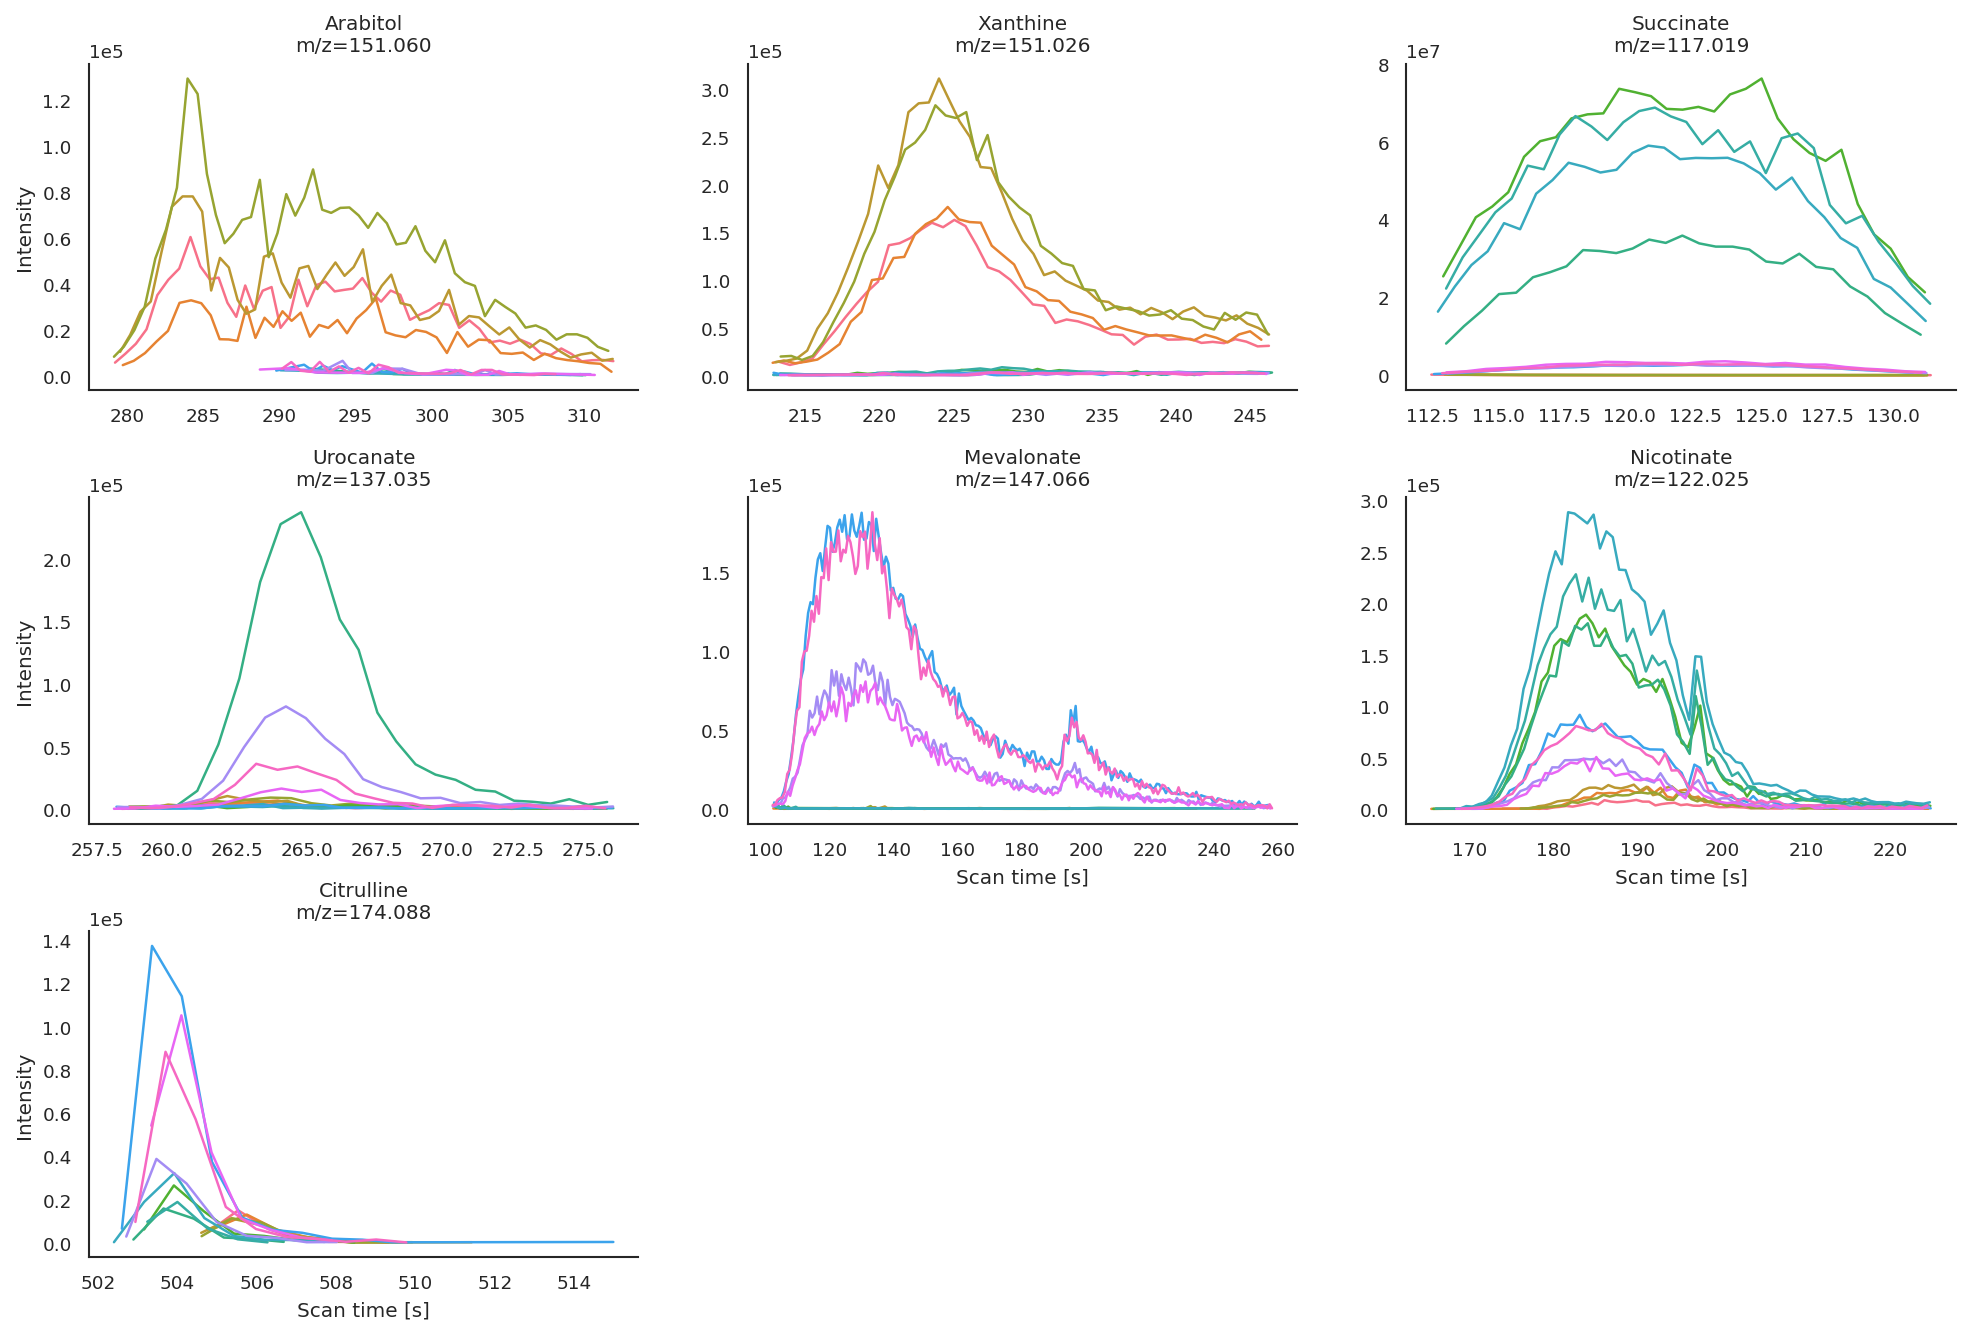

In [59]:
mint.plot.peak_shapes(col_wrap = 3)
plt.savefig('peak-shapes-after-opt.png', facecolor='w')

## Hierarchical clustering

/tmp/ipykernel_4453/3502492078.py:2: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword

/home/swacker/miniconda3/envs/ms-mint/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning:

There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword



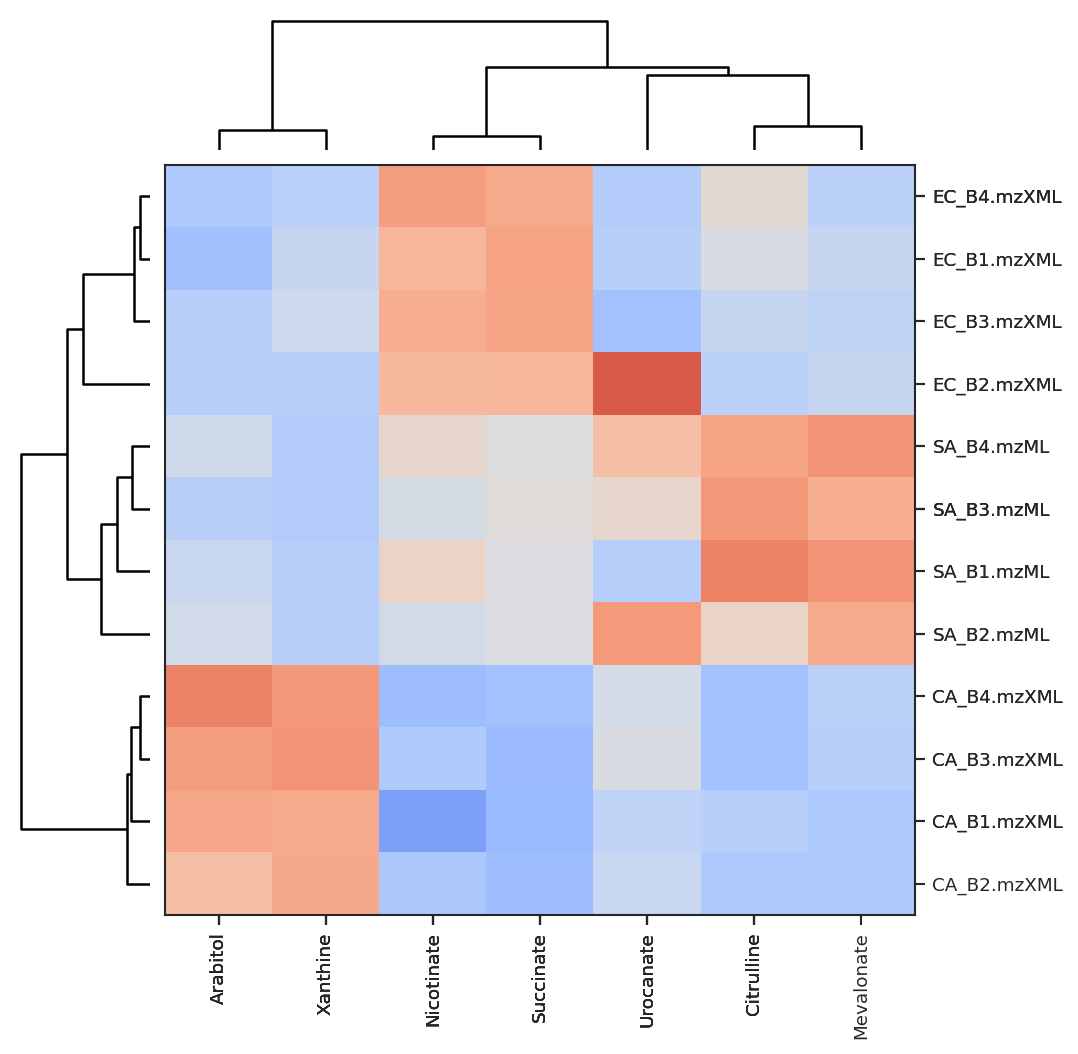

In [60]:
mint.plot.hierarchical_clustering(figsize=(6,6), top_height=1, left_width=1)
plt.savefig('hierarchical_clustering_1.png', facecolor='w', bbox_inches='tight')

## Interactive heatmap

In [15]:
mint.plot.heatmap?

Signature:
mint.plot.heatmap(
    col_name='peak_max',
    normed_by_cols=True,
    transposed=False,
    clustered=False,
    add_dendrogram=False,
    name='',
    correlation=False,
    **kwargs,
)
Docstring:
Creates an interactive heatmap
that can be used to explore the data interactively.
`mint.crosstab()` is called and then subjected to
the `mint.vis.plotly.plotly_tools.plot_heatmap()`.

:param col_name: str, default='peak_max'
    Name of the column in `mint.results` to be analysed.
:param normed_by_cols: bool, default=True
    Whether or not to normalize the columns in the crosstab.
:param clustered: bool, default=False
    Whether or not to cluster the rows.
:param add_dendrogram: bool, default=False
    Whether or not to replace row labels with a dendrogram.
:param transposed: bool, default=False
    If True transpose matrix before plotting.
:param correlation: bool, default=False
    If True convert data to correlation matrix before plotting.

:return: Interactive heatmap.
:

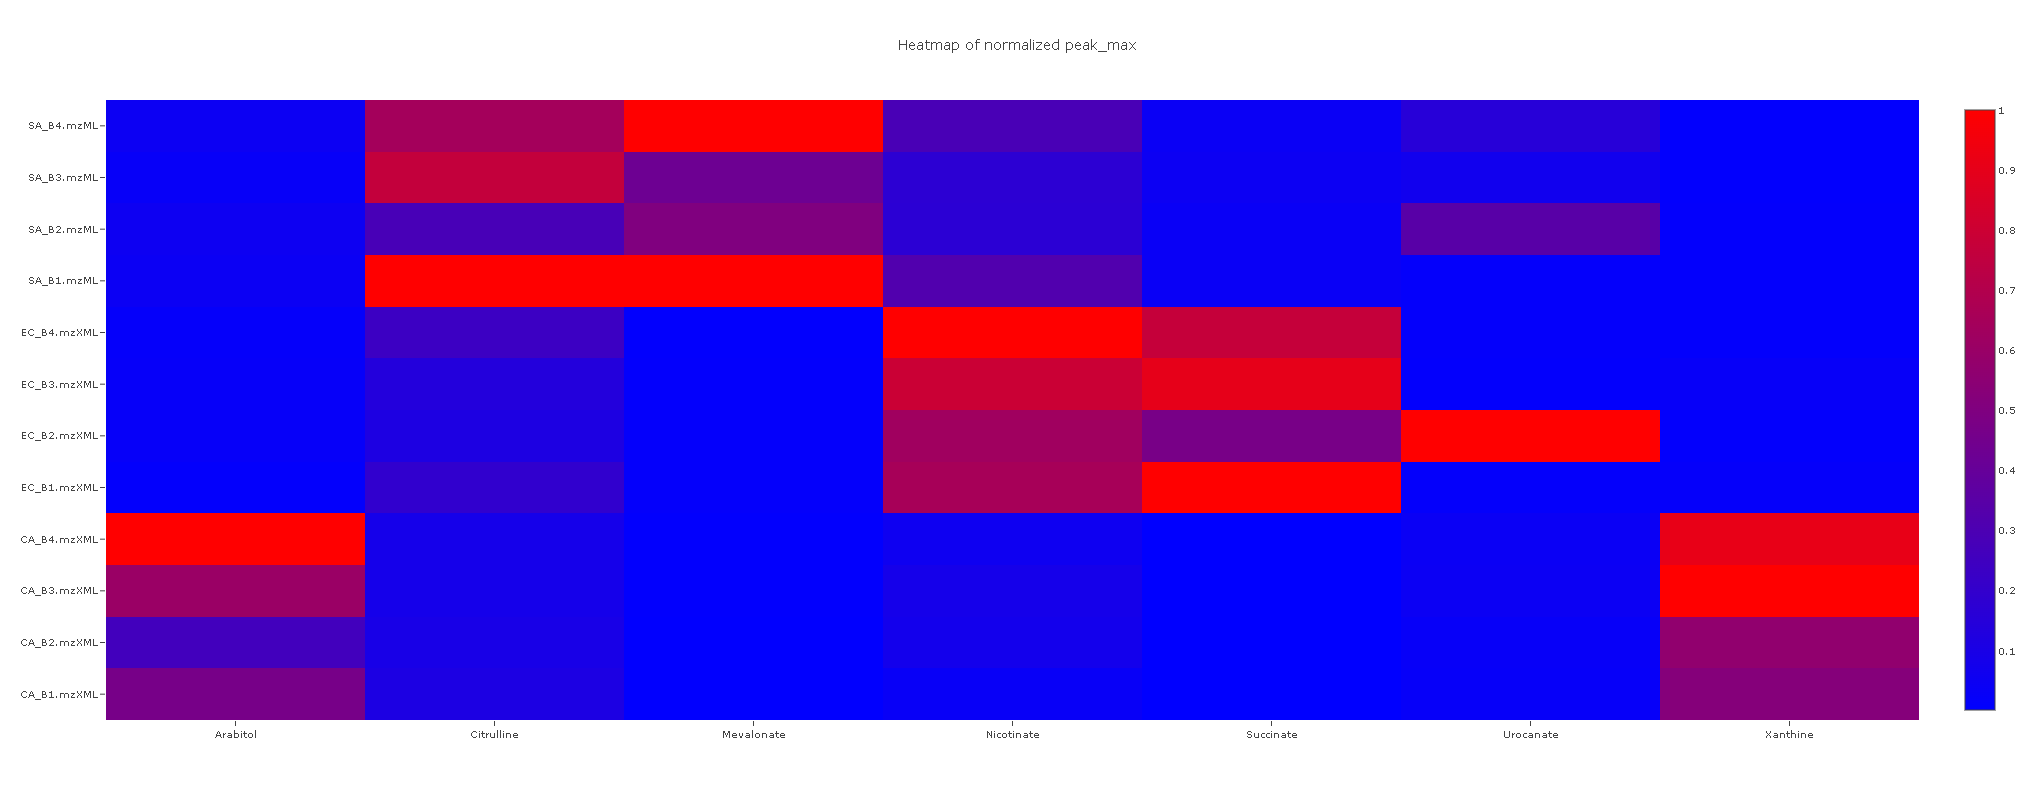

In [16]:
mint.plot.heatmap(height=800, width=800)

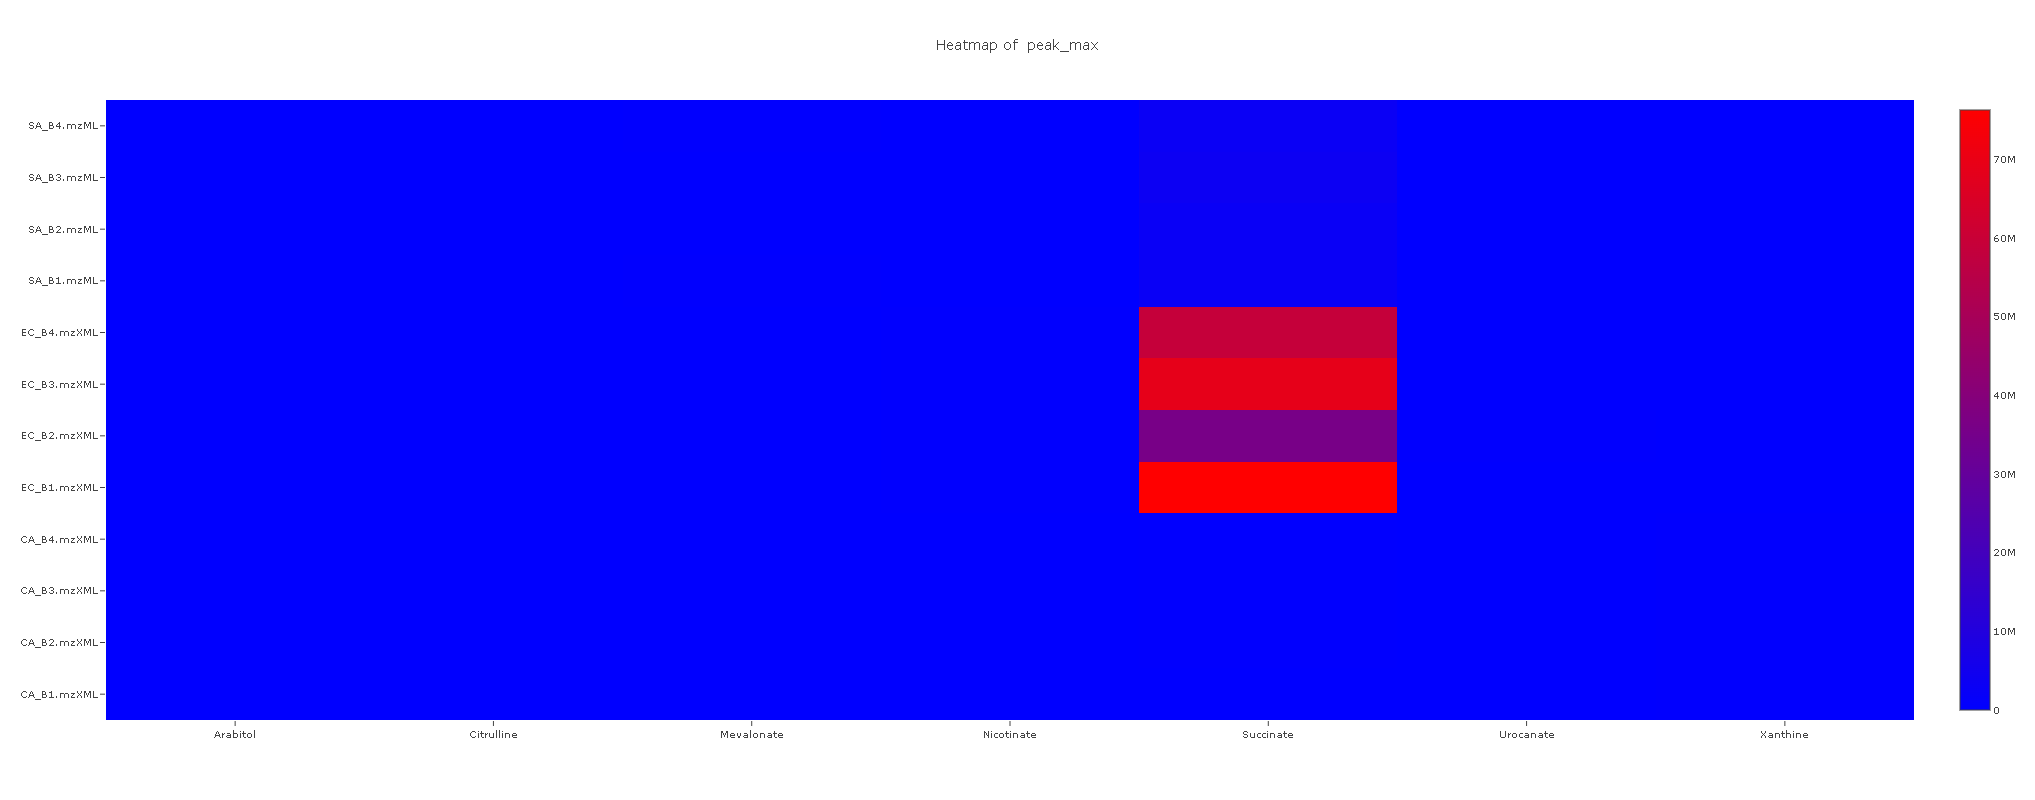

In [17]:
mint.plot.heatmap(height=800, width=800, normed_by_cols=False)

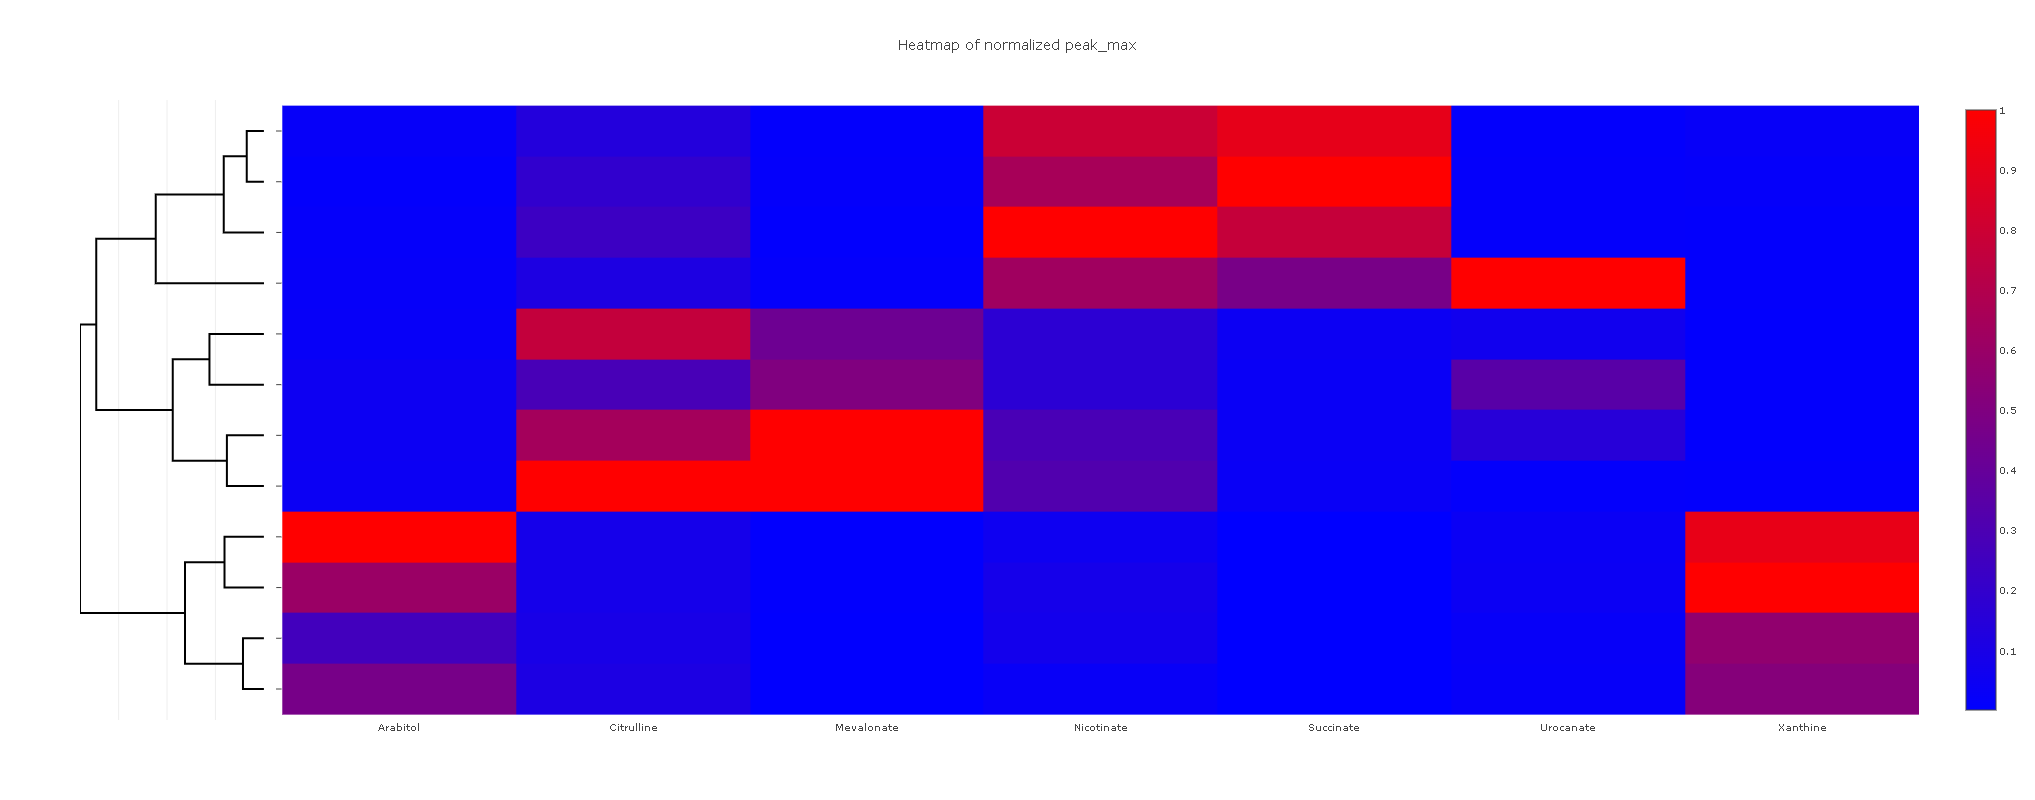

In [18]:
mint.plot.heatmap(height=800, width=800, normed_by_cols=True, clustered=True, add_dendrogram=True)

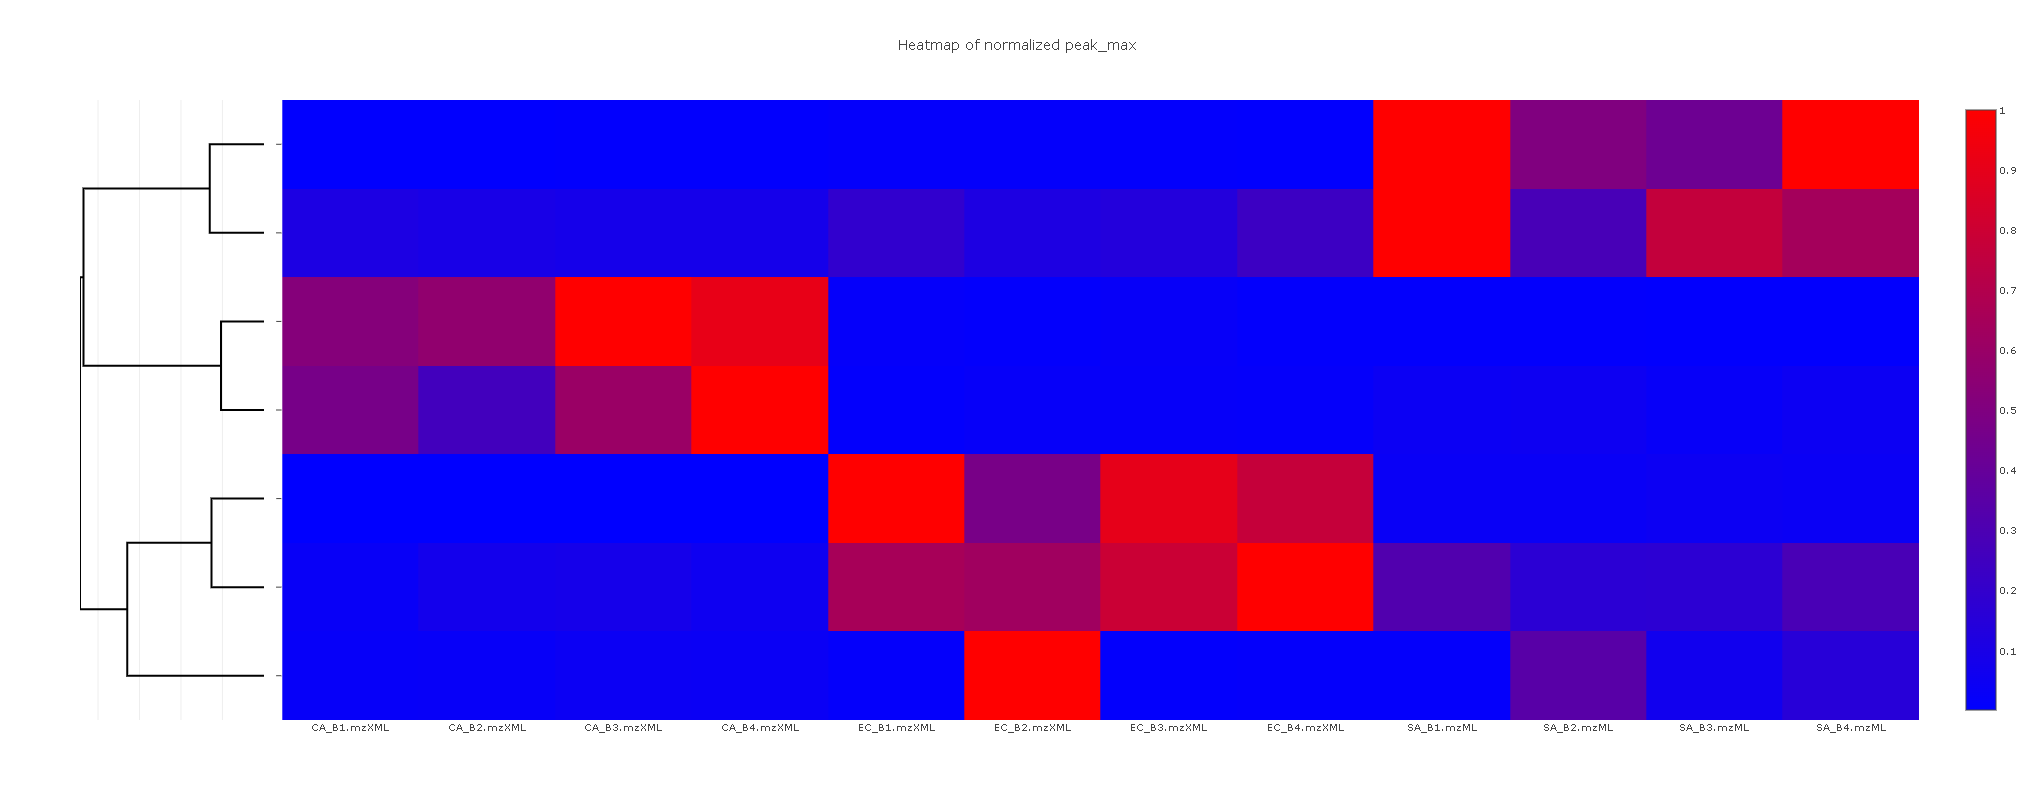

In [19]:
mint.plot.heatmap(height=800, width=800, normed_by_cols=True, clustered=True, add_dendrogram=True, transposed=True)

## Principal Component Analysis

In [6]:
from pathlib import Path as P

In [7]:
labels = [P(fn).name.split('_')[0] for fn in mint.ms_files]
labels

['CA', 'CA', 'CA', 'CA', 'EC', 'EC', 'EC', 'EC', 'SA', 'SA', 'SA', 'SA']

In [8]:
mint.pca.run(5)

/home/swacker/miniconda3/envs/ms-mint/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x600 with 0 Axes>

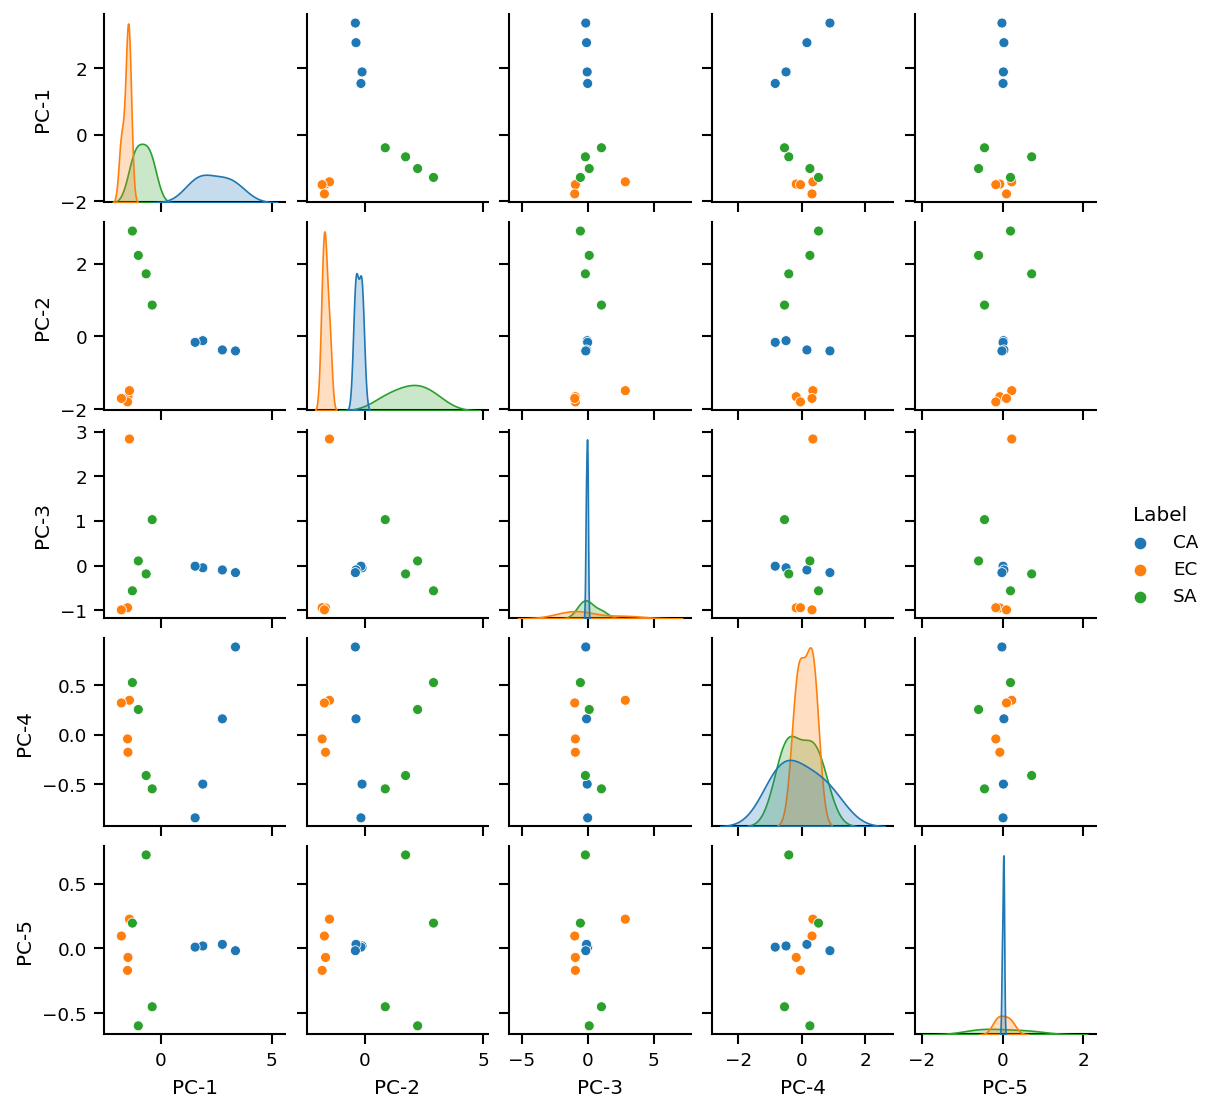

In [9]:
fig = mint.pca.plot.pairplot(n_vars=5, labels=labels, height=1.5)
plt.savefig('pca-pairplot.png', facecolor='w')

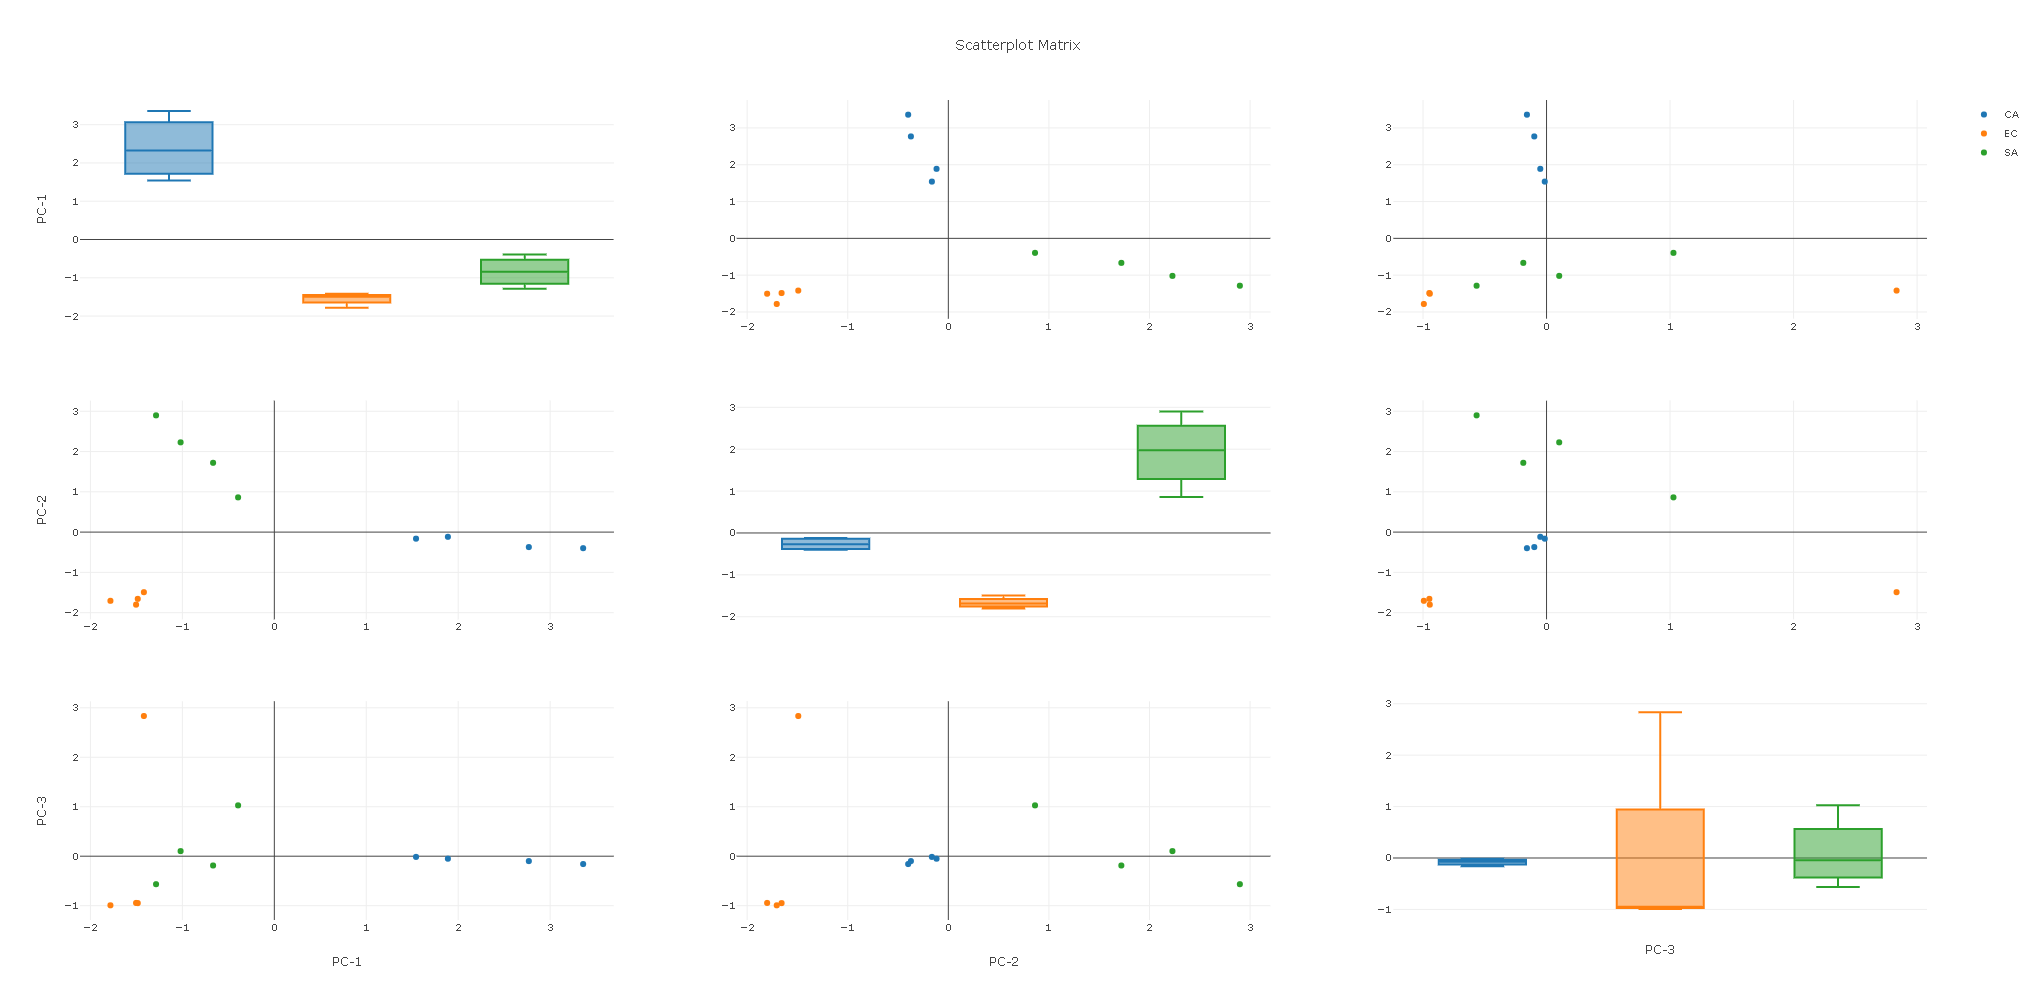

In [10]:
mint.pca.plot.pairplot(n_vars=3, labels=labels, interactive=True, height=1000, width=1000, diag='box')

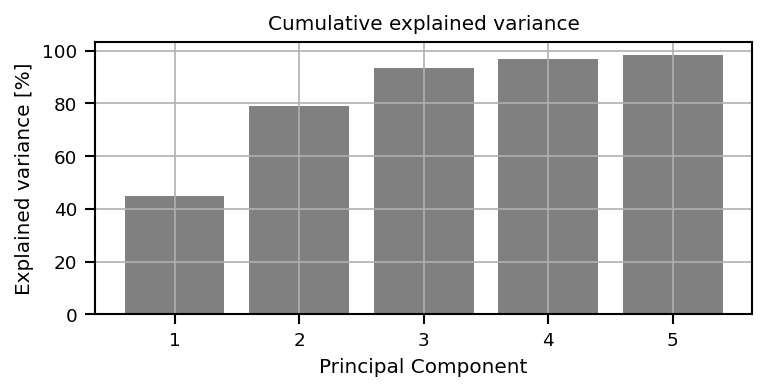

In [11]:
fig = mint.pca.plot.cumulative_variance(aspect=2, height=2.5)
plt.savefig('pca-cum-variance.png')
show()